In [3]:
!pip install fastf1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.0/165.0 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.0/70.0 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: websockets
    Found existing installation: websockets 15.0.1
    Uninstalling websockets-15.0.1:
      Successfully uninstalled websockets-15.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dataproc-spark-connect 0.8.3 requires websockets>=14.0, but you have websockets 13.1 which is incompatible.
google-adk 1.14.1 requires websockets<16.0.0,>=15.0.1, but you have websockets 13.1 which is incompatible.


core           INFO 	Loading data for Azerbaijan Grand Prix - Race [v3.6.1]
INFO:fastf1.fastf1.core:Loading data for Azerbaijan Grand Prix - Race [v3.6.1]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_st

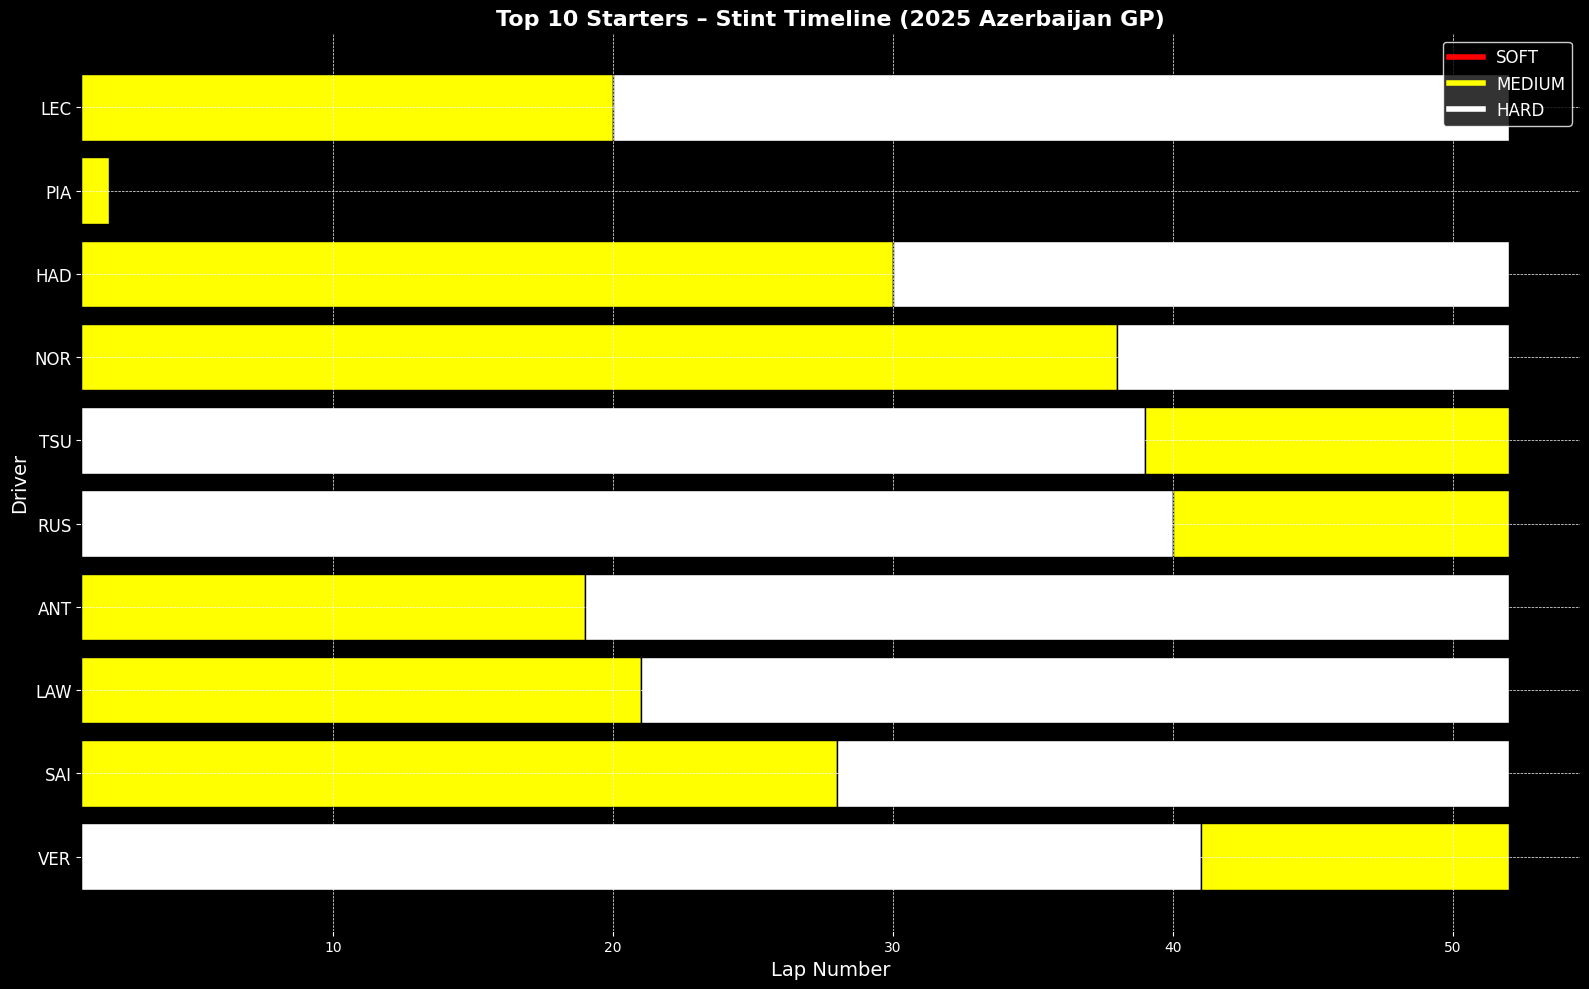

In [4]:
import fastf1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.lines as mlines

# Create the cache directory if it doesn't exist
if not os.path.exists('cache'):
    os.makedirs('cache')

fastf1.Cache.enable_cache('cache')

# Load in session of Azerbaijan Grand Prix Race
session = fastf1.get_session(2025, 'Azerbaijan Grand Prix', 'R')
session.load()

laps = session.laps

# Grouping by Drivers and compounds, defining start of a stint and end of a stint
stints = laps.groupby(['Driver', 'Stint','Compound']).agg(
    start_lap=('LapNumber', 'min'),
    end_lap=('LapNumber','max'),
    stint_length=('LapNumber', 'count')
).reset_index()

# Filter only the top 10 starters
top10 = ['VER', 'SAI', 'LAW', 'ANT', 'RUS', 'TSU', 'NOR', 'HAD', 'PIA', 'LEC']
stints = stints[stints['Driver'].isin(top10)]

# Sort drivers in the order of top10 list (instead of alphabetical)
drivers = top10

colors = {'SOFT': 'red', 'MEDIUM': 'yellow', 'HARD': 'white'}

# Plotting
plt.figure(figsize=(16,10), facecolor='black')

for i, driver in enumerate(drivers):
    driver_stints = stints[stints['Driver'] == driver]
    for _, stint in driver_stints.iterrows():
        plt.barh(
            y=i,
            width=stint['stint_length'],
            left=stint['start_lap'],
            color=colors.get(stint['Compound'], 'grey'),
            edgecolor='black'
        )

# Set y-ticks as driver names
plt.yticks(range(len(drivers)), drivers, color='white', fontsize=12)

# Axis labels and title
plt.xlabel('Lap Number', color='white', fontsize=14)
plt.ylabel('Driver', color='white', fontsize=14)
plt.title('Top 10 Starters – Stint Timeline (2025 Azerbaijan GP)',
          fontsize=16, fontweight='bold', color='white')

# White gridlines
plt.grid(True, color='white', linestyle='--', linewidth=0.5)

# Dark background
plt.gca().set_facecolor('black')
plt.tick_params(colors='white')

# Legend
legend_patches = [mlines.Line2D([0], [0], color=color, lw=4, label=compound)
                  for compound, color in colors.items()]
plt.legend(handles=legend_patches, facecolor='black',
           edgecolor='white', labelcolor='white',
           loc='upper right', fontsize=12)

plt.tight_layout()
plt.show()